## Pandas for Data Cleaning and Processing 

Pandas is a powerful library in Python for data manipulation and analysis. It provides numerous functions for data cleaning and processing. Here are some common functions along with their example uses:


Sources: 

https://www.kdnuggets.com/data-cleaning-with-pandas

https://archive.ics.uci.edu/dataset/53/iris

https://www.freecodecamp.org/news/data-cleaning-and-preprocessing-with-pandasbdvhj/

ChatGPT3.5


### 0.0 Reading data 


In [9]:
import pandas as pd
# Load CSV file into DataFrame
df = pd.read_csv('iris.data.csv')

'''

#df = pd.read_excel('file.xlsx')


import sqlite3
# Connect to SQL database
conn = sqlite3.connect('database.db')
# Load data from SQL query into DataFrame
df = pd.read_sql_query("SELECT * FROM table_name", conn)

df = pd.read_clipboard()

df = pd.read_json('file.json')

url = 'https://example.com/data.csv'
df = pd.read_csv(url)


'''

'\n\n#df = pd.read_excel(\'file.xlsx\')\n\n\nimport sqlite3\n# Connect to SQL database\nconn = sqlite3.connect(\'database.db\')\n# Load data from SQL query into DataFrame\ndf = pd.read_sql_query("SELECT * FROM table_name", conn)\n\ndf = pd.read_clipboard()\n\ndf = pd.read_json(\'file.json\')\n\nurl = \'https://example.com/data.csv\'\ndf = pd.read_csv(url)\n\n\n'

### 1.0 Explore the dataset
 

In [10]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
print(df.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [12]:
#Checking Class Distribution
print(df['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


### 3.0 Removing Missing Values

In [158]:
df = pd.read_csv('missing_row.csv')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Duration  32 non-null     int64 
 1   Pulse     32 non-null     int64 
 2   Maxpulse  32 non-null     int64 
 3   Calories  31 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [115]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [160]:
#Check for missing values
print(df.isnull().sum())



Duration    0
Pulse       0
Maxpulse    0
Calories    1
dtype: int64


In [161]:
df['Calories'] = df['Calories'].astype(float)

In [162]:
#Display updated data types
print(df.dtypes)

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [163]:
#Drop rows with missing valiues and place it in a new variable "df_cleaned"
df_cleaned = df.dropna()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  30 non-null     int64  
 1   Pulse     30 non-null     int64  
 2   Maxpulse  30 non-null     int64  
 3   Calories  30 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [164]:
df['Calories'].fillna(df['Calories'].mean(), inplace=True)


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Pulse     32 non-null     int64  
 2   Maxpulse  32 non-null     int64  
 3   Calories  32 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.1 KB


### 4.0 How to Handle Outliers

In [166]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.00000,32.000000,32.000000,32.000000
mean,55.93750,103.500000,128.500000,304.680000
std,7.66617,7.832933,12.998759,63.839129
min,30.00000,90.000000,101.000000,195.100000
25%,57.50000,100.000000,120.000000,250.700000
50%,60.00000,102.500000,127.500000,300.000000
75%,60.00000,106.500000,132.250000,341.325000
max,60.00000,130.000000,175.000000,479.000000


In [167]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,32.0,55.9375,7.666170,30.0,57.5,60.0,60.000,60.0
Pulse,32.0,103.5000,7.832933,90.0,100.0,102.5,106.500,130.0
Maxpulse,32.0,128.5000,12.998759,101.0,120.0,127.5,132.250,175.0
Calories,32.0,304.6800,63.839129,195.1,250.7,300.0,341.325,479.0


<Axes: >

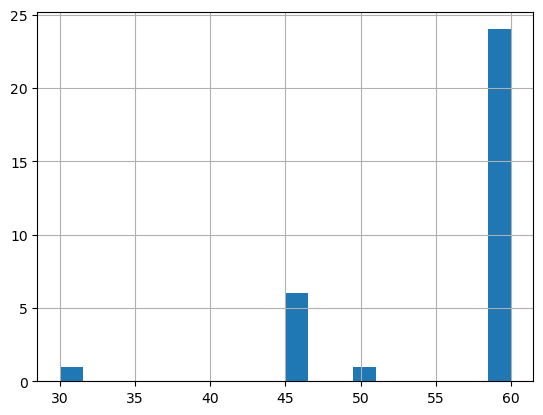

In [168]:
df['Duration'].hist(bins=20)

<Axes: >

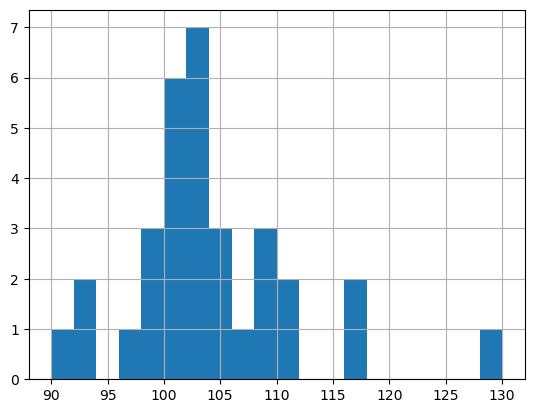

In [169]:
df['Pulse'].hist(bins=20)

<Axes: >

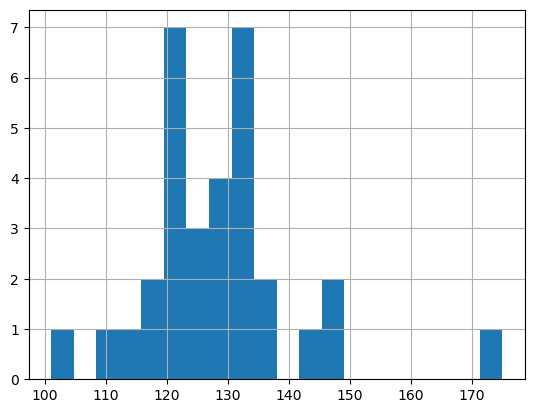

In [170]:
df['Maxpulse'].hist(bins=20)

<Axes: >

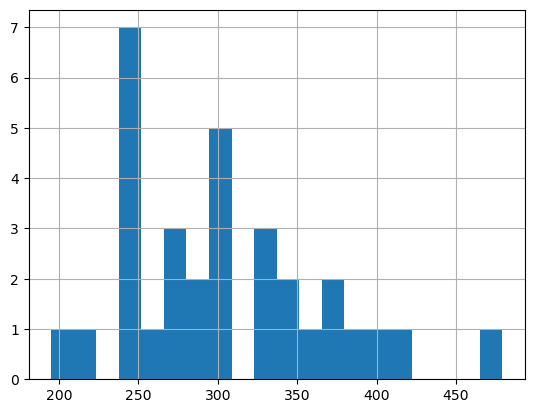

In [171]:
df['Calories'].hist(bins=20)

<Axes: >

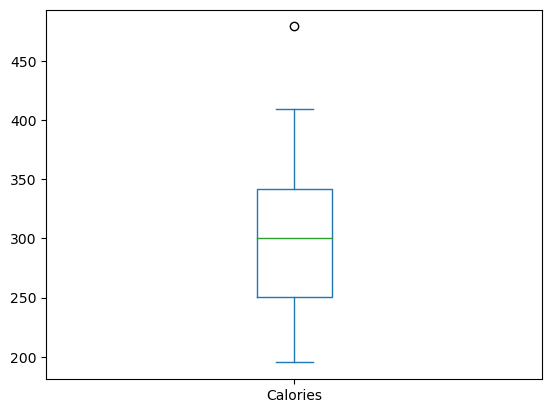

In [172]:
df['Calories'].plot(kind='box')

<Axes: >

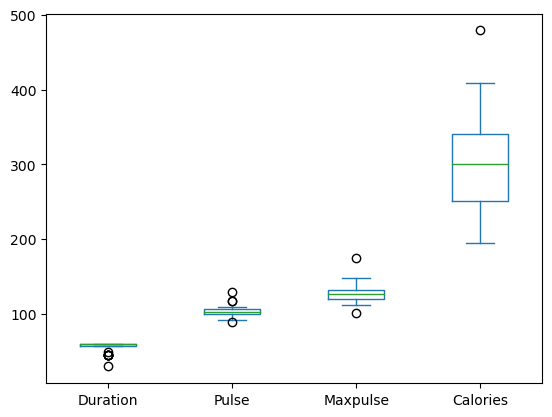

In [173]:
df.plot(kind='box')

In [175]:
def normalize_column(col):
    return (col-col.min())/(col.max()-col.min())

df_norm = df.apply(normalize_column,axis=0) # axis=0 means column-wise

In [176]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,32.0,0.864583,0.255539,0.0,0.916667,1.000000,1.000000,1.0
Pulse,32.0,0.337500,0.195823,0.0,0.250000,0.312500,0.412500,1.0
Maxpulse,32.0,0.371622,0.175659,0.0,0.256757,0.358108,0.422297,1.0
Calories,32.0,0.385981,0.224865,0.0,0.195844,0.369496,0.515058,1.0


<Axes: >

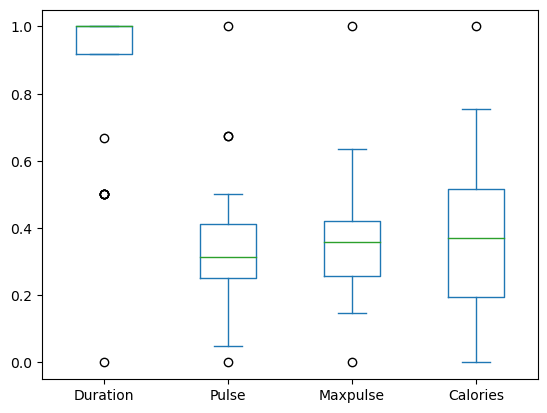

In [178]:
df_norm.plot(kind='box')

In [140]:
Q1 = df['Calories'].quantile(0.25)
Q3 = df['Calories'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[df['Calories'].between(lower_bound, upper_bound)]

In [141]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  31 non-null     int64  
 1   Pulse     31 non-null     int64  
 2   Maxpulse  31 non-null     int64  
 3   Calories  31 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


### 5.0 How to Remove Duplicates

In [142]:
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 1


In [143]:
df[df.duplicated()]

,Duration,Pulse,Maxpulse,Calories
12,60,100,120,250.7


In [144]:
df_no_dup = df.drop_duplicates(inplace=False)

In [138]:
df_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  31 non-null     int64  
 1   Pulse     31 non-null     int64  
 2   Maxpulse  31 non-null     int64  
 3   Calories  31 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


### 6.0 Create New Attributes

In [145]:
## to seconds
def to_second(x):
    return x * 60

df['Duration (mins)'] = df['Duration'].apply(to_second)

In [146]:
df.head()

,Duration,Pulse,Maxpulse,Calories,Duration (mins)
0,60,110,130,409.1,3600
1,60,117,145,479.0,3600
2,60,103,135,340.0,3600
3,45,109,175,282.4,2700
4,45,117,148,406.0,2700


In [147]:
df.describe()

,Duration,Pulse,Maxpulse,Calories,Duration (mins)
count,32.00000,32.000000,32.000000,32.000000,32.000000
mean,55.93750,103.500000,128.500000,304.680000,3356.250000
std,7.66617,7.832933,12.998759,63.839129,459.970195
min,30.00000,90.000000,101.000000,195.100000,1800.000000
25%,57.50000,100.000000,120.000000,250.700000,3450.000000
50%,60.00000,102.500000,127.500000,300.000000,3600.000000
75%,60.00000,106.500000,132.250000,341.325000,3600.000000
max,60.00000,130.000000,175.000000,479.000000,3600.000000


In [148]:
df['Maxpulse Group'] = pd.cut(df['Maxpulse'],bins=[100,120,140,200],labels=['Low','Base','High'])

In [149]:
df['Maxpulse Group'].value_counts()

Maxpulse Group
Base    18
Low     10
High     4
Name: count, dtype: int64

In [150]:
pd.qcut(df['Maxpulse'],q=3,labels=['Low','Base','High']).value_counts()

Maxpulse
Low     12
Base    12
High     8
Name: count, dtype: int64

In [151]:
pd.qcut(df['Maxpulse'],q=3,labels=['Low','Base','High']).value_counts(normalize=True)

Maxpulse
Low     0.375
Base    0.375
High    0.250
Name: proportion, dtype: float64

<Axes: xlabel='Maxpulse'>

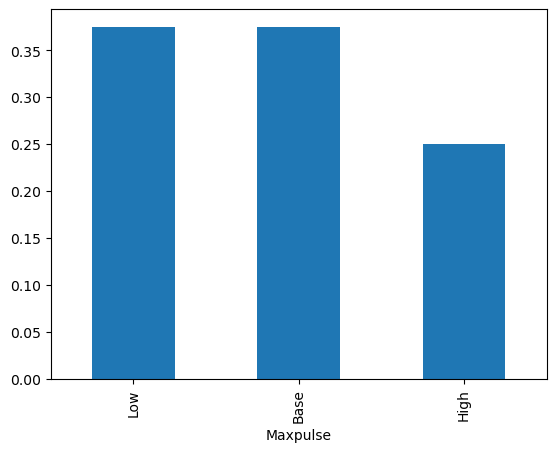

In [152]:
pd.qcut(df['Maxpulse'],q=3,labels=['Low','Base','High']).value_counts(normalize=True).plot(kind='bar')

In [153]:
help(pd.qcut)

Help on function qcut in module pandas.core.reshape.tile:

qcut(x, q, labels=None, retbins: 'bool' = False, precision: 'int' = 3, duplicates: 'str' = 'raise')
    Quantile-based discretization function.
    
    Discretize variable into equal-sized buckets based on rank or based
    on sample quantiles. For example 1000 values for 10 quantiles would
    produce a Categorical object indicating quantile membership for each data point.
    
    Parameters
    ----------
    x : 1d ndarray or Series
    q : int or list-like of float
        Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
        array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
    labels : array or False, default None
        Used as labels for the resulting bins. Must be of the same length as
        the resulting bins. If False, return only integer indicators of the
        bins. If True, raises an error.
    retbins : bool, optional
        Whether to return the (bins, labels) or not.

In [155]:
import numpy as np
df.groupby(['Maxpulse Group']).agg([np.mean,np.std])

Duration                 Pulse               Maxpulse  \
                     mean       std        mean        std        mean   
Maxpulse Group                                                           
Low             57.000000  6.324555  100.200000  11.213088  116.500000   
Base            56.111111  8.323524  103.555556   3.958940  129.555556   
High            52.500000  8.660254  111.500000   6.806859  153.750000   

                             Calories            Duration (mins)              
                      std        mean        std            mean         std  
Maxpulse Group                                                                
Low              6.078194  263.728000  30.679966     3420.000000  379.473319  
Base             4.119141  311.987778  58.601069     3366.666667  499.411418  
High            14.221463  374.175000  86.482228     3150.000000  519.615242

### 7.0 Work with Date times

Converting a column of strings to datetime format using pd.to_datetime().

Extracting components of the date such as year, month, day, and weekday using dt.year, dt.month, dt.day, and dt.weekday.

Filtering the DataFrame based on a date range.

Resampling the DataFrame to a different frequency using resample(), in this case, resampling to daily frequency and calculating the mean.


In [101]:
# Import necessary libraries
import pandas as pd

# Create a DataFrame with dates
data = {'date': ['2024-03-01', '2024-03-02', '2024-03-03', '2024-03-04', '2024-03-05'],
        'value': [10, 20, 15, 25, 30]}
df = pd.DataFrame(data)




In [102]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Print the DataFrame
print("Original DataFrame:")
print(df)



Original DataFrame:
        date  value
0 2024-03-01     10
1 2024-03-02     20
2 2024-03-03     15
3 2024-03-04     25
4 2024-03-05     30


In [103]:
# Extracting date components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday  # Monday is 0, Sunday is 6

# Print the DataFrame with date components
print("\nDataFrame with Date Components:")
print(df)




DataFrame with Date Components:
        date  value  year  month  day  weekday
0 2024-03-01     10  2024      3    1        4
1 2024-03-02     20  2024      3    2        5
2 2024-03-03     15  2024      3    3        6
3 2024-03-04     25  2024      3    4        0
4 2024-03-05     30  2024      3    5        1


In [104]:
# Filtering by date range
start_date = '2024-03-02'
end_date = '2024-03-04'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Print filtered DataFrame
print("\nFiltered DataFrame by Date Range:")
print(filtered_df)




Filtered DataFrame by Date Range:
        date  value  year  month  day  weekday
1 2024-03-02     20  2024      3    2        5
2 2024-03-03     15  2024      3    3        6
3 2024-03-04     25  2024      3    4        0


In [105]:
# Resampling by date
df.set_index('date', inplace=True)
daily_df = df.resample('D').mean()  # Resample to daily frequency and calculate mean
print("\nDaily Resampled DataFrame:")
print(daily_df)


Daily Resampled DataFrame:
            value    year  month  day  weekday
date                                          
2024-03-01   10.0  2024.0    3.0  1.0      4.0
2024-03-02   20.0  2024.0    3.0  2.0      5.0
2024-03-03   15.0  2024.0    3.0  3.0      6.0
2024-03-04   25.0  2024.0    3.0  4.0      0.0
2024-03-05   30.0  2024.0    3.0  5.0      1.0


### 8.0 Merge Dataframes

Inner Join: Only includes rows with keys that appear in both DataFrames.

Left Join: Includes all rows from the left DataFrame and matching rows from the right DataFrame.

Right Join: Includes all rows from the right DataFrame and matching rows from the left DataFrame.

Outer Join: Includes all rows from both DataFrames, filling in missing values with NaN where necessary.

Merge on Multiple Keys: Merges DataFrames on multiple key columns.


You can customize merging behavior by specifying the how parameter ('inner', 'left', 'right', 'outer') and the on parameter to specify the column(s) to join on. Additionally, Pandas supports merging on indexes and merging with different suffixes for overlapping columns.

In [106]:
# Import necessary libraries
import pandas as pd

# Create two DataFrames
left_df = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                        'value_left': [1, 2, 3, 4]})
right_df = pd.DataFrame({'key': ['B', 'C', 'D', 'E'],
                         'value_right': [5, 6, 7, 8]})

# Inner join
inner_join_df = pd.merge(left_df, right_df, on='key', how='inner')
print("Inner Join:")
print(inner_join_df)




Inner Join:
  key  value_left  value_right
0   B           2            5
1   C           3            6
2   D           4            7


In [107]:
# Left join
left_join_df = pd.merge(left_df, right_df, on='key', how='left')
print("\nLeft Join:")
print(left_join_df)




Left Join:
  key  value_left  value_right
0   A           1          NaN
1   B           2          5.0
2   C           3          6.0
3   D           4          7.0


In [108]:
# Right join
right_join_df = pd.merge(left_df, right_df, on='key', how='right')
print("\nRight Join:")
print(right_join_df)




Right Join:
  key  value_left  value_right
0   B         2.0            5
1   C         3.0            6
2   D         4.0            7
3   E         NaN            8


In [109]:
# Outer join
outer_join_df = pd.merge(left_df, right_df, on='key', how='outer')
print("\nOuter Join:")
print(outer_join_df)




Outer Join:
  key  value_left  value_right
0   A         1.0          NaN
1   B         2.0          5.0
2   C         3.0          6.0
3   D         4.0          7.0
4   E         NaN          8.0


In [110]:
# Merge on multiple keys
left_multikey_df = pd.DataFrame({'key1': ['A', 'B', 'C', 'D'],
                                 'key2': ['X', 'Y', 'Z', 'W'],
                                 'value_left': [1, 2, 3, 4]})
right_multikey_df = pd.DataFrame({'key1': ['B', 'C', 'D', 'E'],
                                  'key2': ['Y', 'Z', 'W', 'X'],
                                  'value_right': [5, 6, 7, 8]})
multikey_join_df = pd.merge(left_multikey_df, right_multikey_df, on=['key1', 'key2'], how='inner')
print("\nMerge on Multiple Keys:")
print(multikey_join_df)


Merge on Multiple Keys:
  key1 key2  value_left  value_right
0    B    Y           2            5
1    C    Z           3            6
2    D    W           4            7
